## Import Libraries
I'm importing the libraries needed to build the model, the libraries will help to visualize, manipulate and process the data faster

In [1]:
import sys
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import scipy.stats as ss
import datetime

## Read Data and Data Exploration
I'm reading the data from the path, the data that will be used is csv file. After loading in the data, i need to explore the data a bit to get more insight of the data itself for later processing. By means, if i find any oddities/flaws in the data, i could handle it strategically. Exploring the data also will give us insight of best handling options to do later related to building model process

In [2]:
avo_sales = pd.read_csv(r"C:\Users\Ramadhina\JUPYTER_FILES\files_read\avocados.csv")
avo_sales.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,NaN,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,NaN,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,NaN,8145.35,8042.21,103.14,0.0,NaN,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,NaN,5811.16,5677.40,133.76,0.0,NaN,2015,Albany
4,4,11/29/2015,1.28,NaN,941.48,43838.39,NaN,6183.95,5986.26,197.69,0.0,NaN,2015,Albany


From the columns, i could know what are the columns the dataframe has, their format and meaning. From here there's column (Unnamed :0) which i will drop because it's just id, also i will remove the whitespace in the column name string

In [3]:
avo_sales.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

I want to see the type of the data, from here, i could tell the numerical values and the categorical values/ date values from the datatype, also i could generally know the missing values from the total rows that the columns have

In [4]:
avo_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18233 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18235 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18231 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


From describing the data, i could get the general statistical insight of the data. From this table, i could know if there's any oddities. The thing i could infer from this data is whether the correlation variance of each column is high/low. We consider cv>=1 is high and cv<1 is low. The formula of cv is std/mean. I could calculate it but i prefer just to see the SD through the plot i will later create. Also there does not seem any values that out of shape. The last thing is if there's any outliers. From now i can't determine it because i haven't know what shape of ditributions the columns have. I do not want to mistake the 'extreme' values as outliers because distribution shapes consider outliers values differently. But if there's any of it, we can take care of it later with scaling the values

In [5]:
avo_sales.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.823300e+04,1.824900e+04,1.824900e+04,1.823500e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.513191e+05,2.930084e+05,2.951546e+05,2.285719e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.454985e+06,1.264989e+06,1.204120e+06,1.075035e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.082720e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.077359e+05,8.645300e+03,2.906102e+04,1.856100e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.335910e+05,1.110202e+05,1.502069e+05,6.249530e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avo_sales.shape

(18249, 14)

I'd like to see if this data has Null values, and count them so later, i can handle it with imputation and how much it affects the column at the end.

In [7]:
avo_sales.isnull().sum()

Unnamed: 0       0
Date             0
AveragePrice     0
Total Volume    16
4046             0
4225             0
4770            14
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type            18
year             0
region           0
dtype: int64

## General Column Handling
As i said earlier, i will handle the columns generally, changing the (4046,4225,4660) columns into column name that is more meaningful because only numbers does not have any meaning, also we will remove the whitespace so there'll be no little mistakes in the future, and this will also simplify typing the column names

In [8]:
avo_sales.rename(columns = {'4046':'small PLU sold',
                            '4225':'large PLU sold',
                            '4770':'xlarge PLU sold'},
                 inplace= True)
avo_sales.columns = avo_sales.columns.str.replace(' ','')

## Date Column Handling
I will convert the column (date) into date format that is more tidy and easy to plot later on. Also we will create new columns those are Day, Month, Year. We will use it later to read the seasonality of the price

In [9]:
avo_sales.Date = avo_sales.Date.str.replace('/','-')
dates = [datetime.datetime.strptime(ts,"%m-%d-%Y") for ts in avo_sales['Date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
avo_sales['Date'] = pd.DataFrame({'Date':sorteddates})
avo_sales['Year'], avo_sales['Month'],  avo_sales['Day'] = avo_sales['Date'].str.split('-').str

## Data Visualization 
I will visualize the data before i process it, this will be very helpful to know the relationships between the dependent and independent variables, the trend and the seasonality

### Plotting General Relationship 

C:\Users\Ramadhina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ramadhina\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

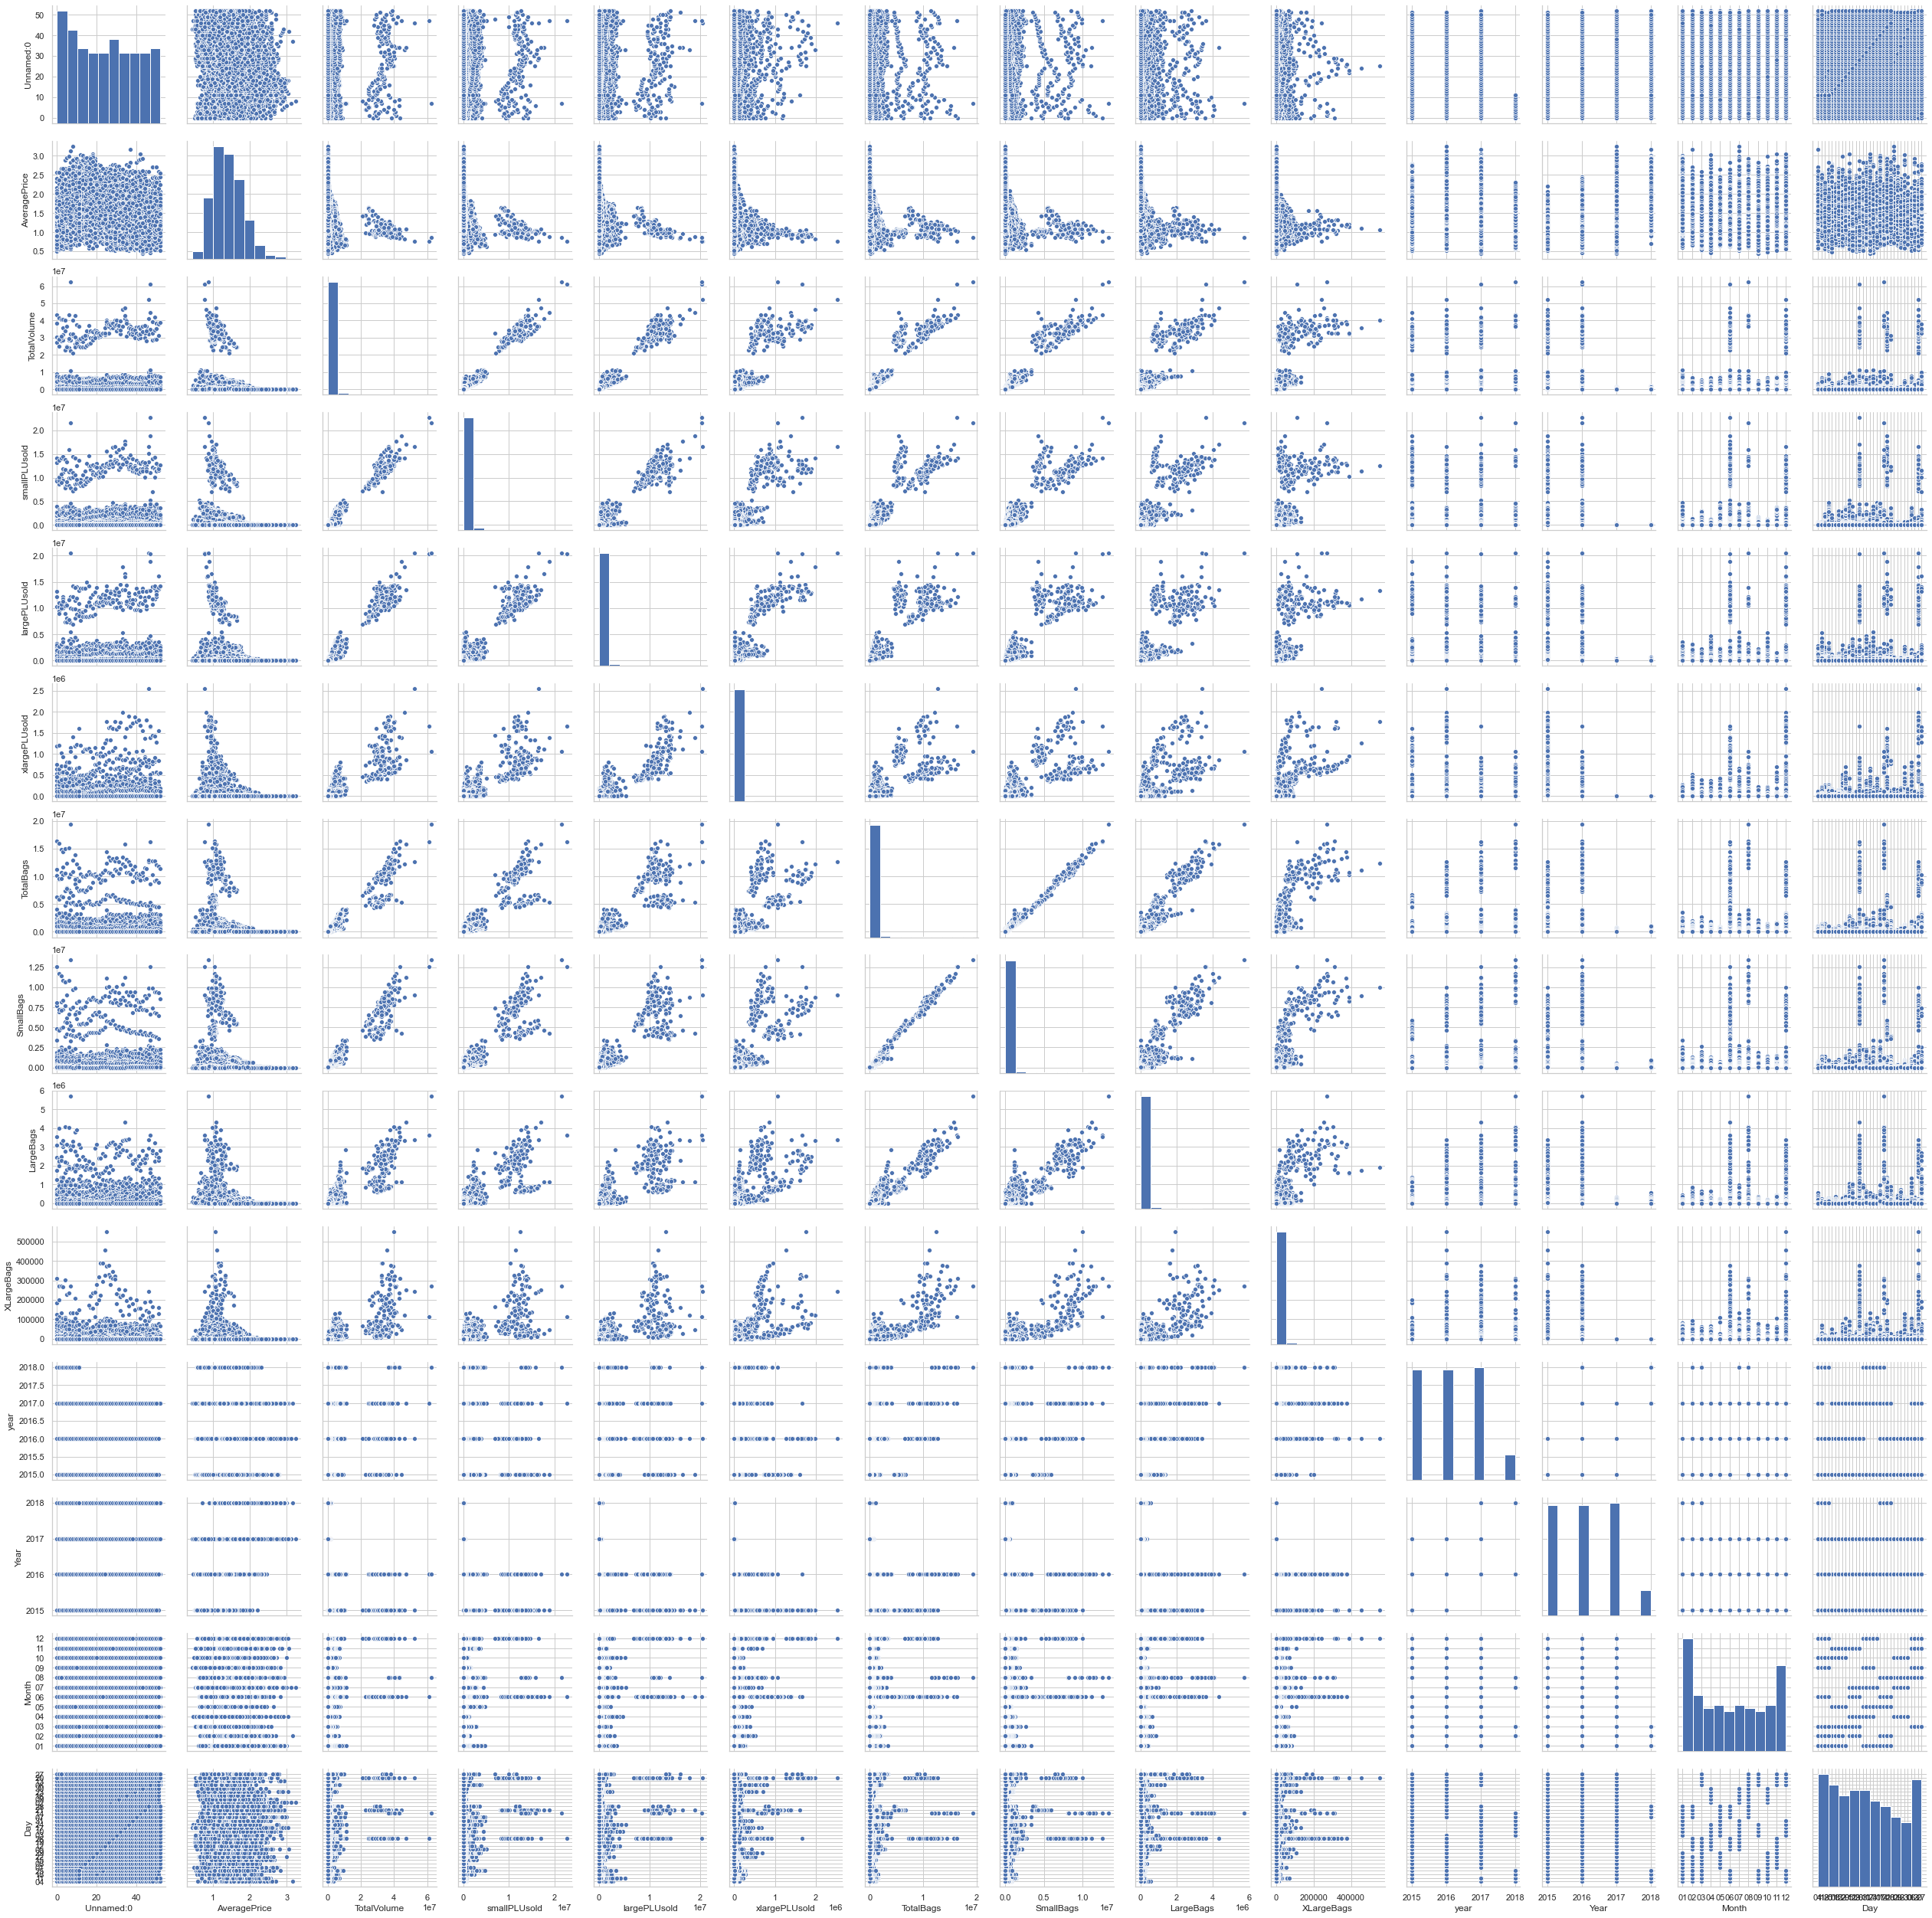

In [10]:
plt.figure()
ax = sns.pairplot(avo_sales)

### Plotting Correlation Matrix For Numerical Features
Plotting correlation matrix will help us to understand how much the variables have impacts on each others. The scatter plot above gives the general relationship but the correlation matrix, they have scaled values. This will give me better insight of what variable that has the most impact, this could also give me insight of data quality that will later have impact in building the model. From here, for the numerical features, all of them have a weak negative correlation towards the target which is AveragePrice. This could lead to poor quality model. But i will see if advance algorithm and using only meaningful features can make a good model

(11.5, -0.5)

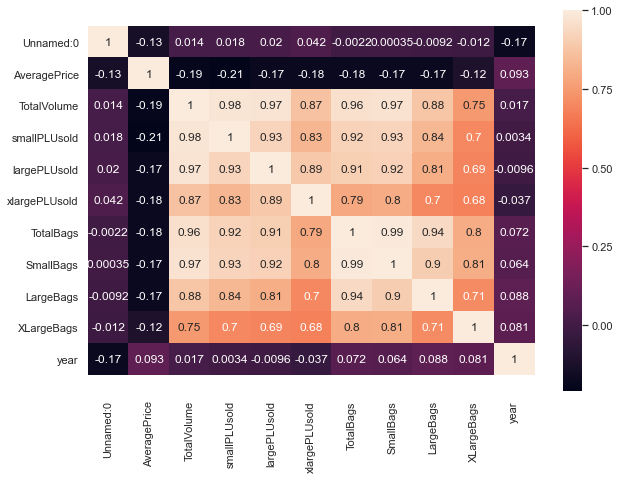

In [11]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(avo_sales.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Calculating Correlation Value For Categorical Feature
I already know the correlation matrix for the numerical values. But the heatmap above does not support categorical feature, so i will calculate the correlation value between the categorical feature (type) and the target. I actually could encode the categorical values and plot the correlation but this time i'd like to try finding the correlation without 'manipulating' the values of the categorical feature.

In [12]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(avo_sales.AveragePrice, avo_sales.type).values
print('Correlation value of type with AveragePrice : ',cramers_v(confusion_matrix))

Correlation value of type with AveragePrice :  0.6470947830004818


### Plotting Average Price Distribution

This plot shows that the distribution is a bit skewed to the left, we could scale it later to make it more normal

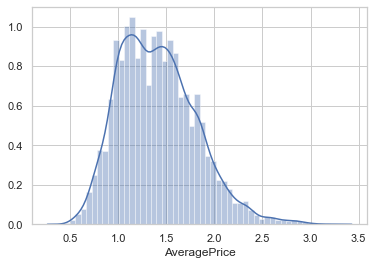

In [13]:
plt.figure()
ax = sns.distplot(avo_sales.AveragePrice)

### Plotting Type Popularity

I'd like to see if the popularity of the type is significantly different but it seems both almost have the same popularity. So for now we could conclude that people preference of type of avocado is equal

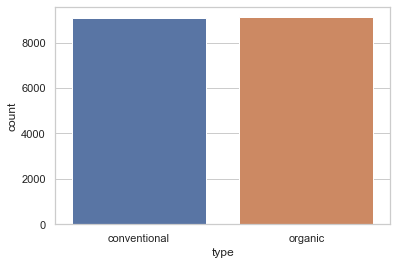

In [14]:
plt.figure()
ax = sns.countplot(avo_sales.type)

I would like to see if the both type popularity actually different if we see through the timeline, not in in general like above, but then again both type popularity is almost similar.

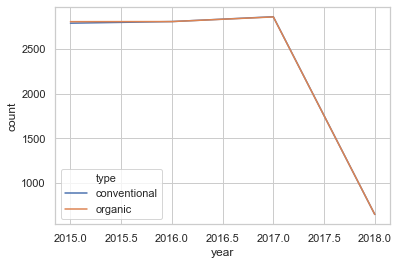

In [15]:
df = avo_sales.copy()
df = df.groupby(['year','type']).agg(count=('type', 'count'))
df = df.reset_index()
plt.figure()
sns.lineplot(x="year", y="count", hue='type', data=df)

### Plotting AveragePrice in each region

From this plot i'd like to see which region contributes most in AveragePrice feature, this could give me better insight which region will be the target of the marketing strategy to boost the income from that region 

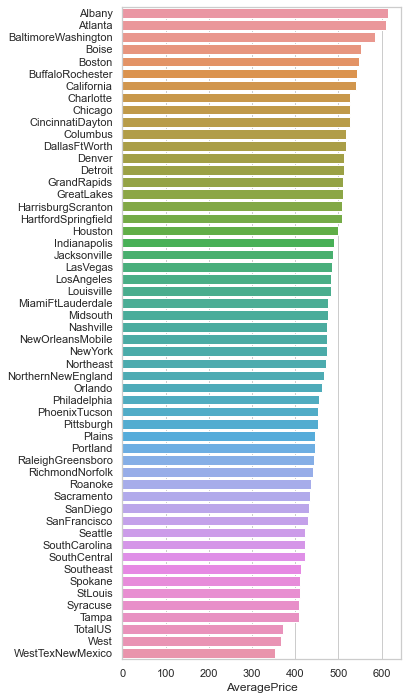

In [16]:
plt.figure(figsize=(5,12))
ax = sns.barplot(avo_sales.groupby(['region'])['AveragePrice'].sum().sort_values(ascending=False),
                  avo_sales.region.unique(),ci=None)

### Plotting Average Price by Date

Through Date, i could see that there are fluctuations over the time. I also could see that the AveragePrice increase through years.

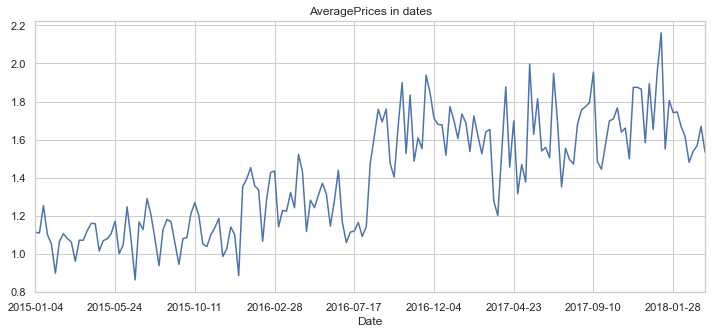

In [17]:
dategroup = avo_sales.groupby('Date').mean()
plt.figure(figsize=(12,5))
plt.title('AveragePrices in dates')
dategroup.AveragePrice.plot(x = avo_sales.Date)

The plot below, shows the seasonality within Months, i could see that the AveragePrice is likely at peak in October and the lowest point in June

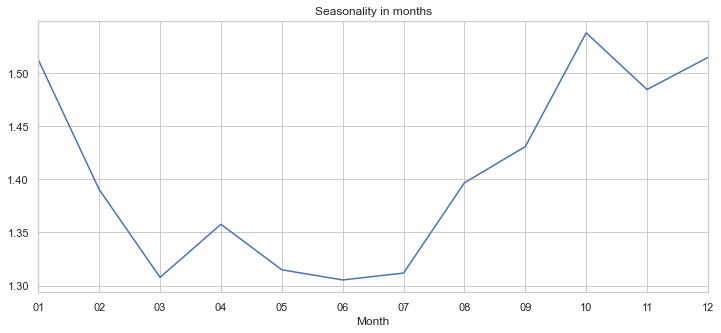

In [18]:
monthgroup = avo_sales.groupby('Month').mean()
plt.figure(figsize=(12,5))
plt.xticks(ticks=range(0,13))
plt.title('Seasonality in months')
monthgroup.AveragePrice.plot(x = avo_sales.Month)

### Data Preprocessing

I then proceed to do the data preprocessing, i drop the columns Unnamed:0,region,Date,year because they don't have good correlation with the AveragePrice and poor features will only make my model perform poorly, i don't want that.

In [19]:
X = np.array(avo_sales.drop(['AveragePrice','Unnamed:0','region','Date','year'],1))
y = np.array(avo_sales.AveragePrice)

impC = SimpleImputer(strategy='most_frequent')
X[:,8] = impC.fit_transform(X[:,8].reshape(-1,1)).ravel()

imp = SimpleImputer(strategy='median')
X[:,0:8] = imp.fit_transform(X[:,0:8])

le = LabelEncoder()
X[:,8] = le.fit_transform(X[:,8])

sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Hyperparameter Tuning RandomSearchCV

Now, i will start to build the model. I will use Random Forest Regressor because Random forests add ensemble learning to the mix, making decision trees even more robust and especially well equipped to deal with noisy data, whereas standard regression methods can get easily confused by noise, it can also implicitly handle collinearity in features. In here, i try to tune without having my laptop crashing so i tune a few but important parameters.

In [20]:
max_features = ['auto', 'sqrt','log2']
min_samples_leaf = [1, 3, 5, 10, 20, 50 ,100]
bootstrap = [True, False]
random_grid = {
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
              }
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr , 
                                param_distributions = random_grid,
                                n_iter = 10, cv = 10, verbose= 2, 
                                random_state=10, n_jobs = -1,
                                return_train_score=True)
rfr_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [21]:
rfr_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}

### EVALUATING MODEL

I will evaluate the model i built and use the evaluation to compare the model i built and tuned the hyperparameter vs the base model that i don't tune at all.

In [22]:
def evaluate(model,X_test, y_test):
    y_pred = model.predict(X_test)
    r_squared = metrics.r2_score(y_test, y_pred)
    adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mae = metrics.mean_squared_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R2 : ',r_squared)
    print('Adjusted R2 : ',adj_r_squared)
    print('MAE : ',mae)
    print('MSE : ',mse)
    print('RMSE : ',rmse)

**This is the result of the evaluation of the Tuned Random Forest Regressor**

In [23]:
best_rfr_random = rfr_random.best_estimator_
evaluate(best_rfr_random, X_test, y_test)

R2 :  0.846166946350303
Adjusted R2 :  0.8456593860963034
MAE :  0.15396413221627703
MSE :  0.15396413221627703
RMSE :  0.39238263495761


**This is the result of the evaluation of the Base Random Forest Regressor**

In [24]:
base_rf = RandomForestRegressor()
base_rf.fit(X_train,y_train)
evaluate(base_rf,X_test,y_test)

R2 :  0.8431560205476416
Adjusted R2 :  0.8426385259769986
MAE :  0.15697762357834794
MSE :  0.15697762357834794
RMSE :  0.39620401762014973


### CONCLUSION

1. **Model Evaluation** :The model that i tuned the hyperparameter is slightly better than the base model but that's good enough since i only tuned very few of parameters, i want to note that the more hyperparameter we could tune the better the model performance is, but also we need to keep in mind that it costs a lot of memory and it's generally expensive. It could be seen that tuning a few of it the time spent is 4.2 minutes, i already tried to tuned more hyperparameters with more combinations and it costs more than one hour just to crash since it results thousands of combinations tried by the machine. But the most important thing is we know that hypertuning could optimized our model to perform better.
2. **Insight from data exploration** : From the plots we see that the preferences of type of the avocado are equal, so if we imagine to create marketing strategy to boost the sales, we could supply same amount of avocado types. Secondly we could see there's seasonality in months so we could supply more in that months like in peak months also we could use discount in lowest point in month so people could be interested buying more to boost the sales. Also we could prepare the marketing strategy to overcome the fluctuations of sales through years.